# Bank Marketing Prediction

# i. Introduction  
**Name:** Jenny AT  

**Problem statement:**  
The data is related with direct marketing campaigns of a Portuguese banking institution.  
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required. 
 
**Objective:**  
This project is created to predict if clients would choose ('yes') or not ('no') subscribed to the product (bank term deposit).  
The models used for this prediction are: `Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree and Random Forest`.

# ii. Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Feature Engineering
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import phik
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Import Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import CrossValidation & Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from imblearn.over_sampling import SMOTE

# Import Model Evaluation
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, precision_score, recall_score

# Import Model Inference
import pickle

# Import warning
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

In [4]:
# Open & Read Data Source = csv
open('bank-additional-full.csv', 'r')

# Set data as DataFrame
df_ori = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Duplicate data ori
df = df_ori.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We use delimiter during data loading because the data was displayed inappropriately, because the the CSV file uses semicolon (;) instead of a comma (,)

In [5]:
# Checking data -1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Looks like there are no missing values, let's check further:

In [6]:
print(df.isnull().sum())
print(f'{round(df.isnull().mean()*100)}%')

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64%


It's certain that there are no missing values.  
Now let's check for any data duplicates

In [7]:
# Check data duplicate
df.duplicated().sum()

12

Now drop the duplicated data

In [8]:
# Drop data duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Re-check data duplicate
df.duplicated().sum()

0

Duplicated data removed successfully  

Now we also need to drop 'duration' column because it highly affects the output target (e.g., if duration=0 then y='no'),   
to make a more realistic prediction

In [10]:
# Drop 'duration' column
df.drop('duration', axis=1, inplace=True)

In [11]:
# Re-check 'duration' column drop
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

'duration' column removed successfully

# iv. Exploratory Data Analysis

In [12]:
# Check -1
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
# Check -2
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### Objective 1: Let's look into more detail of the distribution of ages among the individuals in the dataset. 

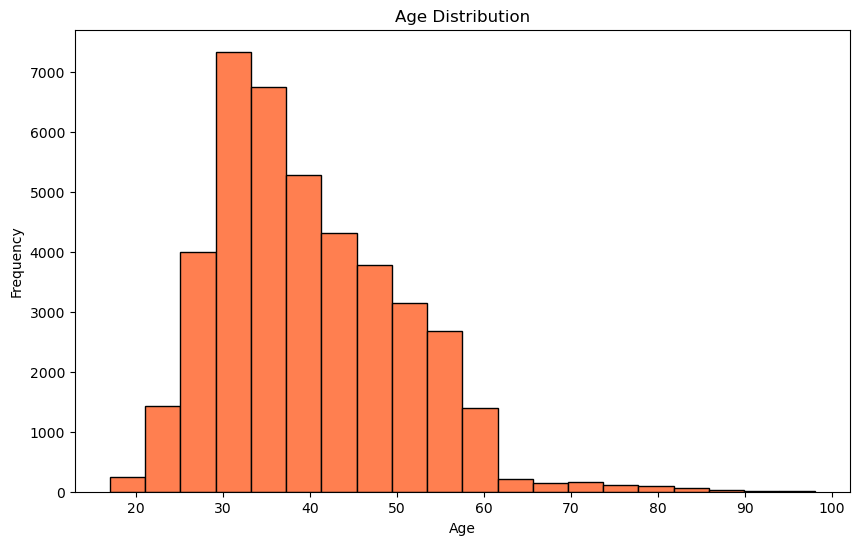

In [14]:
# Plot histogram
df['age'].plot(kind='hist', bins=20, figsize=(10, 6), color='coral', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display plot
plt.show()

It can be seen that most of the bank's clients are heavily populated by clients in their mid 30s. 

The numbers decline as the age increases, meaning that the bank might try and think of promotional means to attract older customer by creating programs such as pension deposits, etc., as they can become a very valuable client.

##### Objective 2:  Find the proportion of individuals with different jobs.

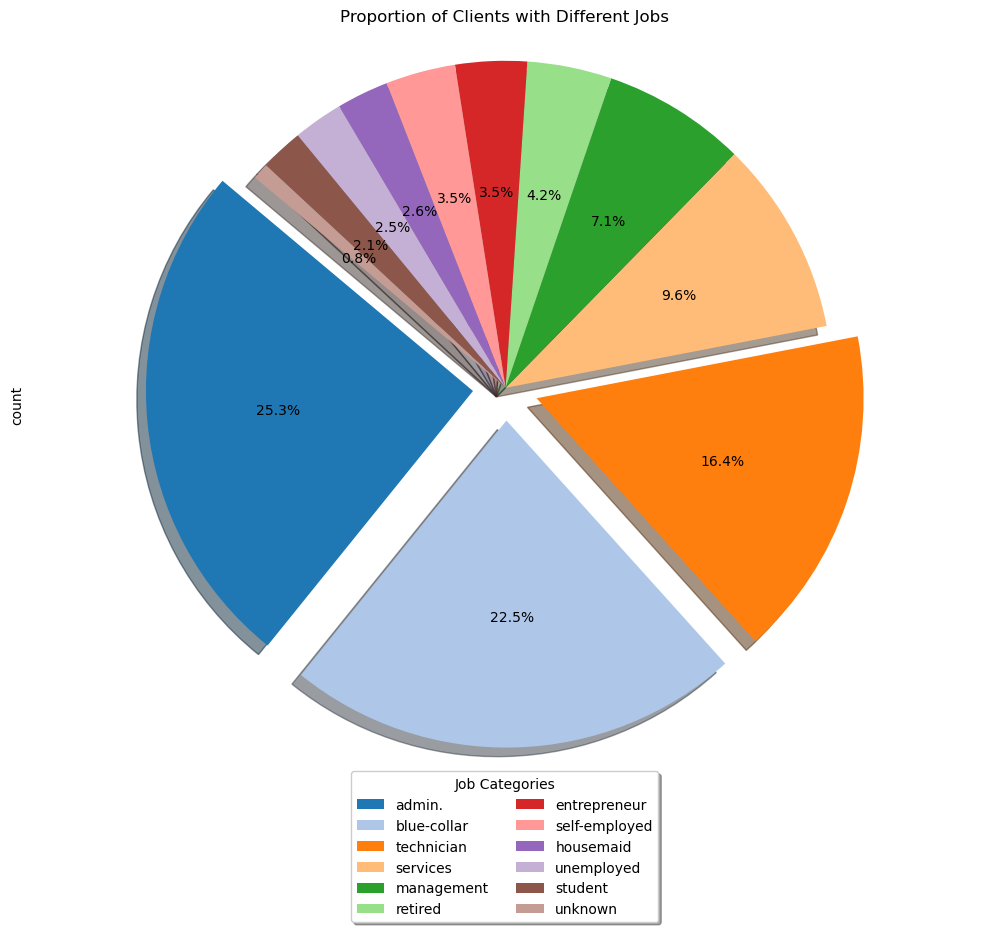

In [15]:
# Calculate the frequency of each job category
job_counts = df['job'].value_counts()

# Create an explode list for the top 3 values
explode = [0.1 if category in job_counts.index[:3] else 0 for category in job_counts.index]

# Define a custom colormap with distinct colors
colors = plt.get_cmap('tab20').colors[:12]

# Plot the pie chart without labels
job_counts.plot(kind='pie', figsize=(10, 8), labels=None, autopct='%1.1f%%', startangle=140, shadow=True, explode=explode, colors=colors)

plt.title('Proportion of Clients with Different Jobs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()


# Add legend below the pie chart
plt.legend(labels=job_counts.index, title='Job Categories', loc='lower center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)

# Display plot
plt.show()

From this figure, it can be concluded that most of the bank's client's occupation is consisted of admin, followed by blue-collar workers, and then technicians.  

With this finding, the bank could think of ways of how to attract more "high-paying' occupational clients such as management, entrepreneur or even the retired group.

Or, it could stick with catering to these highest job groups but making sure they do provide the best service to retain clients from switching to other banks, since these jobs are volatile.

The bank could also think of appealing more to students by creating more student discounts, etc. 

##### Objective 3: Visualize how loans are distributed across different job categories

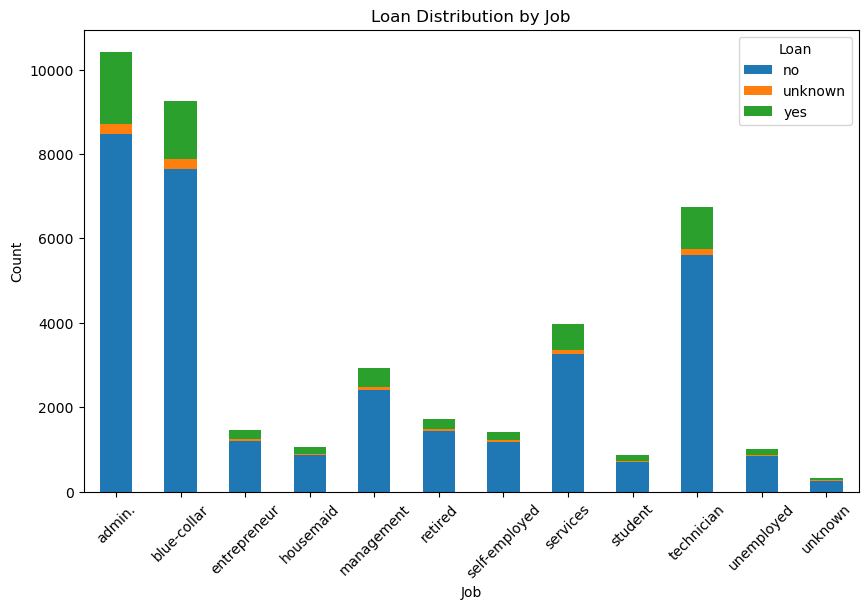

In [16]:
# Create a cross-tabulation (contingency table) of job and loan
cross_table = pd.crosstab(df['job'], df['loan'])

# Plot the stacked bar chart
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Loan Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan', loc='upper right')

# Show the plot
plt.show()

The admin job has both the highest number of people who takes loan and who does not take loan. 

It has to be further explored whether the 'no' decision is because the workers do not apply for a loan, or their approval is declined by the bank, which the bank should be cautious of to high-risk jobs.

#### Objective 4: Create a boxplot for age and education

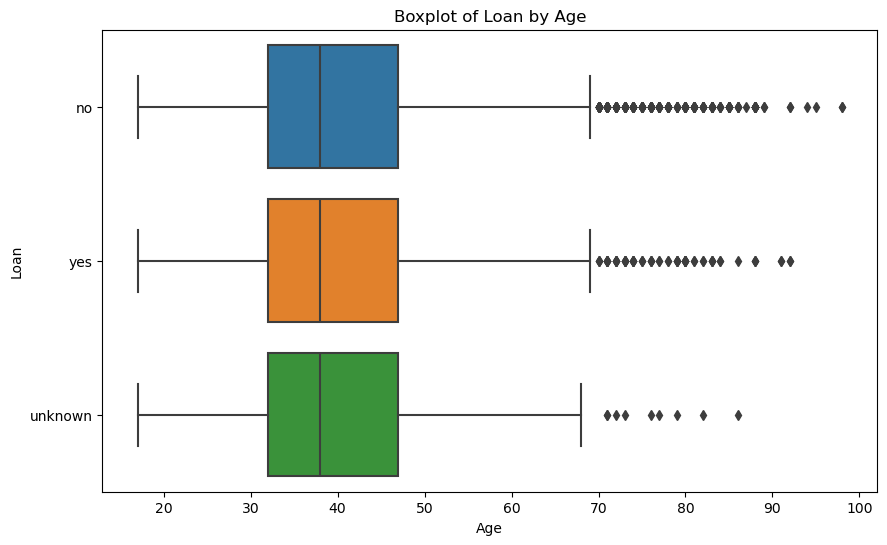

In [17]:
# Create a boxplot for 'age' grouped by 'education'
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='loan', data=df)
plt.title('Boxplot of Loan by Age')
plt.xlabel('Age')
plt.ylabel('Loan')

# Display plot
plt.show()

The median and quartiles among the loan categories are symmetrical, except for the unknown category, with a slightly lesser upper adjacent value.

The outlier is most visible in the no loan category.  
This could mean that most elderly people rarely take loans. 

Some other products that the bank can offer to this customer group are insurance, credit cards, and investment services.

##### Objective 5: Visualize the distribution of default status in the dataset. 

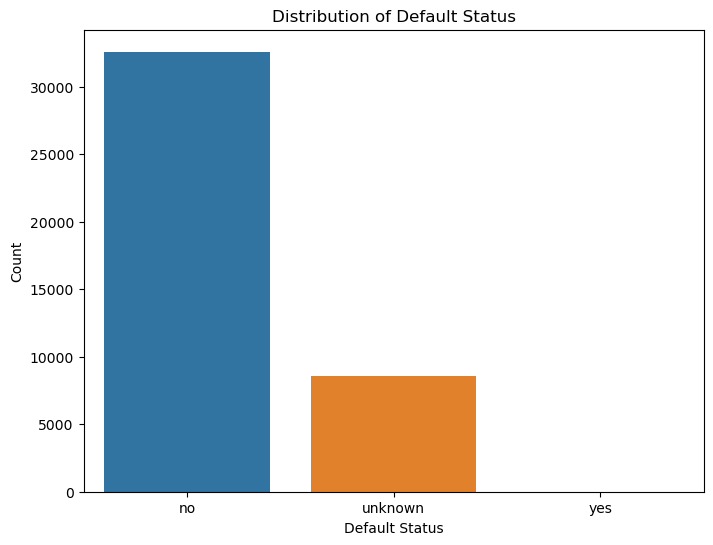

In [18]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='default', data=df)
plt.title('Distribution of Default Status')
plt.xlabel('Default Status')
plt.ylabel('Count')

# Display plot
plt.show()

Almost all clients have a 'no' status of default credit.

With this data, the bank can better understand the distribution of defaults in their loan portfolio, leading to more informed decision-making and strategic planning for risk management and policy development.

# v. Data Preprocessing

### Split between X (Features/Variables) and y (Target/Label)

In [19]:
# Split X and y
X = df.drop(['y'], axis=1)

y = df['y']

print(X.columns)
print(y)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')
0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object


We can see that the target (y) is still in string format.  
To move further we need to encode the target with `Label Encoder`

In [20]:
# Encode the target variable
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y)

# Convert the encoded target variable to a DataFrame
y1 = pd.DataFrame(y1, columns=['y1'])

# Display the DataFrame
print(y1)

       y1
0       0
1       0
2       0
3       0
4       0
...    ..
41171   1
41172   0
41173   0
41174   1
41175   0

[41176 rows x 1 columns]


### Split train set and test set

In [21]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y1, test_size=0.2, random_state=70) 
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3200,41,services,married,basic.9y,no,yes,yes,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
34987,44,management,married,university.degree,no,yes,no,cellular,may,fri,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1
13235,45,blue-collar,divorced,basic.4y,no,no,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
26426,50,management,divorced,high.school,unknown,no,no,cellular,nov,thu,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
27365,55,technician,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8


In [22]:
# Check shape
print('Train-set:',X_train.shape)
print('Test-set:',X_test.shape)

Train-set: (32940, 19)
Test-set: (8236, 19)


## a. Missing value handling

In [23]:
X_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [24]:
y_train.isnull().sum()

y1    0
dtype: int64

In [25]:
X_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [26]:
y_test.isnull().sum()

y1    0
dtype: int64

No missing values detected, we're good to go.

## b. Outliers Handling

In [27]:
# Detect categorical colums
X[X.select_dtypes(include=['object']).columns]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [28]:
# Create looping to check distribution numerical dataset

num = X.select_dtypes(exclude=['object']).columns.tolist()

# Create empty list to contain/add/fill (menyimpan) column lists
normal = []
skew = []
extreme = []
for i in num:
    print(f'skewness {i}: {round(X_train[i].skew(),3)}')

    if abs(round(X_train[i].skew(),3)) > 1: 
        extreme.append(i)
    elif abs(round(X_train[i].skew(),3)) > 0.5:
        skew.append(i)
    else:
        normal.append(i)

print(f'normal distribution: {normal}.') 
print('skew distribution:',skew, '.') 
print(f'extreme skew distribution:{extreme}.')

skewness age: 0.775
skewness campaign: 4.807
skewness pdays: -4.951
skewness previous: 3.87
skewness emp.var.rate: -0.723
skewness cons.price.idx: -0.235
skewness cons.conf.idx: 0.298
skewness euribor3m: -0.708
skewness nr.employed: -1.045
normal distribution: ['cons.price.idx', 'cons.conf.idx'].
skew distribution: ['age', 'emp.var.rate', 'euribor3m'] .
extreme skew distribution:['campaign', 'pdays', 'previous', 'nr.employed'].


Based on the results above, the distributed columns are:  
1. Normal (-0.5 to 0.5): 'cons.price.idx', 'cons.conf.idx'.  
2. Moderately Skew (-0.5 to-1 atau 0.5 to 1): 'age', 'emp.var.rate', 'euribor3m'.  
3. Extreme Skew (> 1 or < -1) : 'campaign', 'pdays', 'previous', 'nr.employed'.

### Outlier checking for each distribution type

### Normal check

In [29]:
# Create function for the normal distribution
def calculate_normal_outliers(df, variable):
 
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
        
    outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')

In [30]:
# Using loop to call normal function
for i in normal:
    calculate_normal_outliers(X_train,i)
    print('')

Outlier cons.price.idx : 0
% Outlier cons.price.idx : 0.0%

Outlier cons.conf.idx : 0
% Outlier cons.conf.idx : 0.0%



There are no outliers in the normally distributed category.  
So no further handling is required.

### Skew & Extreme check

In [31]:
# Create function for skew distributed
def calculate_skewed_outliers(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')

In [32]:
# Using loop to call moderately skew function
for i in skew:
    calculate_skewed_outliers(X_train,i,1.5)
    print('')

Outlier age : 376
% Outlier age : 1.14%

Outlier emp.var.rate : 0
% Outlier emp.var.rate : 0.0%

Outlier euribor3m : 0
% Outlier euribor3m : 0.0%



There is an outlier for the feature 'age', since the outlier is under 5%,  
then it will be handled through trimming.

#### Extreme skew

In [33]:
# Using loop to call extreme skew function
for i in extreme:
    calculate_skewed_outliers(X_train,i,3)
    print('')

Outlier campaign : 863
% Outlier campaign : 2.62%

Outlier pdays : 1199
% Outlier pdays : 3.64%

Outlier previous : 4456
% Outlier previous : 13.53%

Outlier nr.employed : 0
% Outlier nr.employed : 0.0%



Let's check on the 'previous' column due to its outstanding number of outlier percentage

<Axes: >

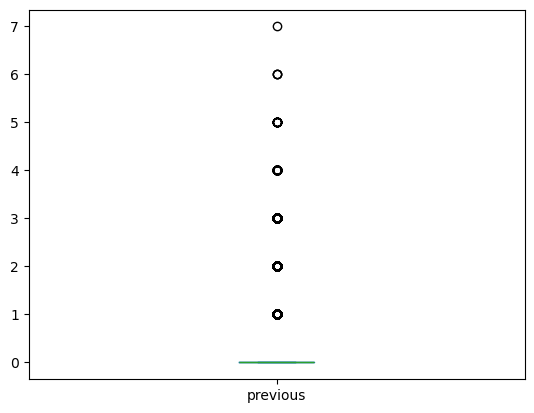

In [34]:
# Simple visualisation of 'previous' column
X_train.previous.plot(kind='box')

Looks like the median is at 0 and the values within 1.5 times the IQR from the median are all 0.

In [35]:
# Check unique values
print(X_train['previous'].unique())

[0 1 2 3 4 5 6 7]


Thus, the outliers for the features 'campaign', 'pdays', and previous' will be handled with trimming.   
Even though its outlier exceeds 5%, the feature 'previous' will not be capped as it is too small in number.

### Handling outlier with trimming method

In [36]:
Trim_skew_features_list = ['age']
Trim_extreme_skew_features_list = ['campaign', 'pdays', 'previous']

Trim the moderately skewed distribution

In [37]:
def drop_skew_outliers(df, variable,distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index,inplace=True)

In [38]:
for i in Trim_skew_features_list:
    drop_skew_outliers(X_train,i,1.5)

print(f'Before trim: {X_train.shape}') 

Before trim: (32564, 19)


Trim the extremely skewed distribution

In [39]:
def drop_extreme_skew_outliers(df, variable,distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index,inplace=True)

In [40]:
for i in Trim_extreme_skew_features_list:
    drop_extreme_skew_outliers(X_train,i,3)

print(f'Before trim: {X_train.shape}') 

Before trim: (27411, 19)


Reset index before setting y_train to x_train

In [41]:
# After preprocessing, reset indices of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Then, align y_train with the indices of X_train
y_train = y_train.loc[X_train.index]

## c. Feature Selection

We are going to select features with the correlation phi-k matrix now.

In [42]:
# Concat features and target to check correlation
corr = pd.concat([X_train,y_train],axis=1)
corr.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y1'],
      dtype='object')

In [43]:
# Check correlation
corr.phik_matrix()['y1']

interval columns not set, guessing: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y1']


age               0.000000
job               0.018302
marital           0.000000
education         0.000000
default           0.000000
housing           0.000000
loan              0.000000
contact           0.018968
month             0.000000
day_of_week       0.000878
campaign          0.004060
emp.var.rate      0.003357
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y1                1.000000
Name: y1, dtype: float64

The results are tremendously weak.  
Meaning these data have a low correlation among each other.  
Now let's try using recursive feature elimination (RFE) with a logistic regression model for the feature selection

In [44]:
# Define the categorical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define the encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, cat_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# Define the model for feature selection
estimator = LogisticRegression()

# Initialize RFE
rfe = RFE(estimator)

# Define the number of features to select
n_features_to_select = 5

# Fit RFE to the transformed data and specify the number of features to select
rfe.fit(X_transformed, y1)
rfe.n_features_to_select = n_features_to_select

# Get selected features
selected_features_indices = rfe.support_
selected_features = [col for i, col in enumerate(X.columns) if selected_features_indices[i]]

print("Selected Features:")
print(selected_features)

Selected Features:
['age', 'job', 'marital', 'housing', 'contact', 'month', 'previous', 'euribor3m', 'nr.employed']


From the result above, it means that we should remove these columns =  
['education', 'default', 'loan', 'day_of_week', 'campaign', 'pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']

In [45]:
# Drop unnecessary columns in X_train
X_train.drop(['education', 'default', 'loan', 'day_of_week', 'campaign', 'pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'], axis=1, inplace=True)

# Drop unnecessary columns in X_test
X_test.drop(['education', 'default', 'loan', 'day_of_week', 'campaign', 'pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'], axis=1, inplace=True)

In [46]:
# Check new columns
X_train.columns

Index(['age', 'job', 'marital', 'housing', 'contact', 'month', 'previous',
       'euribor3m', 'nr.employed'],
      dtype='object')

## d. Split Numerical and Categorical Columns

In [47]:
# Split num col & cat col
num_col = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'numerical: {num_col}')
print(f'categorical: {cat_col}')

numerical: ['age', 'previous', 'euribor3m', 'nr.employed']
categorical: ['job', 'marital', 'housing', 'contact', 'month']


To sum up, the numerical data are entailed of the columns ['age', 'previous', 'euribor3m', 'nr.employed'].  
Meanwhile, the categorical data are made up of the columns ['job', 'marital', 'housing', 'contact', 'month'].

In [48]:
# Create empty list to contain/add/fill (menyimpan) column lists
normal = []
skew = []
extreme = []
for i in num_col:
   
    if abs(round(X_train[i].skew(),3)) > 1: 
        extreme.append(i)
    elif abs(round(X_train[i].skew(),3)) > 0.5:
        skew.append(i)
    else:
        normal.append(i)

print(f'normal distribution: {normal}.')
print(f'skew distribution: {skew}.') 
print(f'extreme skew distribution:{extreme}.')

normal distribution: ['age', 'previous'].
skew distribution: [].
extreme skew distribution:['euribor3m', 'nr.employed'].


In [49]:
# Split data for standard and robust scaler first
num_col_std = ['age', 'previous']
num_col_rbs = ['euribor3m', 'nr.employed']

print(num_col_std)
print(num_col_rbs)

['age', 'previous']
['euribor3m', 'nr.employed']


Now let's also split the categorical data into ordinal data and nominal data.

In [50]:
# Create categorical ordinal and nominal grouping
cat_col_ord = ['month']
cat_col_nom = ['job', 'marital', 'housing', 'contact']

print(cat_col_ord)
print(cat_col_nom)

['month']
['job', 'marital', 'housing', 'contact']


## e. Cardinality Check

In [51]:
# Count unique value for each categorical columns
for i in cat_col:
    print(f'{i} : {X_train[i].nunique()}')

job : 12
marital : 4
housing : 3
contact : 2
month : 10


The column with high cardinality is 'job'.  
The other columns have low cardinality as they have unique values under 11.  

Let's take a further look for the column 'job'.

In [52]:
print(X_train['job'].unique())

['services' 'blue-collar' 'management' 'technician' 'admin.'
 'self-employed' 'retired' 'unemployed' 'student' 'entrepreneur' 'unknown'
 'housemaid']


For this case, we are going to reduce the cardinality of 'job' with Domain Knowledge Grouping

In [53]:
# Define a mapping based on domain knowledge
job_mapping = {
    'admin.': 'admin.',
    'blue-collar': 'manual',
    'technician': 'technical',
    'services': 'services',
    'management': 'management',
    'entrepreneur': 'self-employed',
    'self-employed': 'self-employed',
    'retired': 'non-active',
    'housemaid': 'manual',
    'unemployed': 'non-active',
    'student': 'non-active',
    'unknown': 'unknown'
}

# Apply the mapping to the 'job' column
X_train['job'] = X_train['job'].map(job_mapping)

print(X_train['job'].value_counts())

job
manual           7106
admin.           6862
technical        4589
services         2696
non-active       2008
self-employed    1976
management       1950
unknown           224
Name: count, dtype: int64


Now let's check once again to make sure the cardinality has been reduced.

In [54]:
# Count unique value for each categorical columns
for i in cat_col:
    print(f'{i} : {X_train[i].nunique()}')

job : 8
marital : 4
housing : 3
contact : 2
month : 10


The unique count of 'job' is reduced from 12 to 8.  
Now we can proceed with defining the models.

# vi. Model Definition

Let's define the scalers and encoders for the data to create `ColumnTransformer`.

In [55]:
# Define the transformers
std_scaler = StandardScaler()
rbs_scaler = RobustScaler()
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ordinal_encoder = OrdinalEncoder(categories=[['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('std', std_scaler, num_col_std),
        ('rbs', rbs_scaler, num_col_rbs),
        ('onehot', onehot_encoder, cat_col_nom),
        ('ordinal', ordinal_encoder, cat_col_ord)
    ],
    remainder='passthrough'
)

Now create pipeline for the different models that we are using here.

In [56]:
# Model definition using pipeline
pipe_log = make_pipeline(preprocessor, LogisticRegression(random_state=70))
pipe_svc = make_pipeline(preprocessor, SVC(random_state=70))
pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())
pipe_nb = make_pipeline(preprocessor, GaussianNB())
pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(class_weight='balanced', random_state=70))
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=70))

After pipeline, to find out the best model, we are using cross validation.

In [57]:
# Define cross val for each pipeline
warnings.filterwarnings('ignore')
cv_log = cross_val_score(pipe_log, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_svc = cross_val_score(pipe_svc, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_knn = cross_val_score(pipe_knn, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_nb = cross_val_score(pipe_nb, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_dt = cross_val_score(pipe_dt, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

I have inputted warnings.filterwarnings('ignore') but apparently it doesn't work.

Now define the best model based on the CV score above.

In [58]:
# Finding best model based on Cross_val_score (mean)

name_model = []
cv_scores = 0

for cv,name in zip([cv_log, cv_svc, cv_knn, cv_nb, cv_dt, cv_rf],
                   ['log', 'svc', 'knn', 'nb', 'dt', 'rf']):
    print(name)
    print('f1-score - All - Cross Validation :', cv)
    print('f1-score - Mean - Cross Validation :', cv.mean())
    print('f1-score - Std - Cross Validation :', cv.std())
    print('f1-score - Range of test set :', (cv.mean()-cv.std()), '-',(cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

print(f'Best Model: {name_model}')
print(f'Cross Val Mean from best model: {cv_scores}')

log
f1-score - All - Cross Validation : [0. 0. 0. 0. 0.]
f1-score - Mean - Cross Validation : 0.0
f1-score - Std - Cross Validation : 0.0
f1-score - Range of test set : 0.0 - 0.0
--------------------------------------------------
svc
f1-score - All - Cross Validation : [0. 0. 0. 0. 0.]
f1-score - Mean - Cross Validation : 0.0
f1-score - Std - Cross Validation : 0.0
f1-score - Range of test set : 0.0 - 0.0
--------------------------------------------------
knn
f1-score - All - Cross Validation : [0.03116147 0.02911208 0.02820874 0.02906977 0.02061856]
f1-score - Mean - Cross Validation : 0.027634124691079738
f1-score - Std - Cross Validation : 0.003639670193297332
f1-score - Range of test set : 0.023994454497782407 - 0.03127379488437707
--------------------------------------------------
nb
f1-score - All - Cross Validation : [0.         0.         0.02564103 0.0244898  0.        ]
f1-score - Mean - Cross Validation : 0.010026164311878596
f1-score - Std - Cross Validation : 0.01228488865

Based on the result above, we are going to use `DecisionTree()` as it is the most decent one compared to the rest.

# vii. Model Training

To train model, we are using .fit

In [59]:
# Train best model
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['age', 'previous']),
                                                 ('rbs', RobustScaler(),
                                                  ['euribor3m', 'nr.employed']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital', 'housing',
                                                   'contact']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['mar',
                                                                              'apr',
                                                                              'may',
                                                                              'jun',
                                                                              'jul',
                                                                              'aug',
                                                                              'sep',
                                                                              'oct',
                                                                              'nov',
                                                                              'dec']]),
                                                  ['month'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=70))])

In [60]:
# Evaluate model DT
y_pred_train = pipe_dt.predict(X_train)
y_pred_test = pipe_dt.predict(X_test)

# Print classification report
print(f'Decision Tree - Train - Before Tuning')
print(f'{classification_report(y_train, y_pred_train)}')
print('')
print(f'Decision Tree - Test - Before Tuning')
print(f'{classification_report(y_test, y_pred_test)}')

Decision Tree - Train - Before Tuning
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     24288
           1       0.51      0.99      0.67      3123

    accuracy                           0.89     27411
   macro avg       0.75      0.93      0.80     27411
weighted avg       0.94      0.89      0.90     27411


Decision Tree - Test - Before Tuning
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      7342
           1       0.09      0.14      0.11       894

    accuracy                           0.75      8236
   macro avg       0.49      0.48      0.48      8236
weighted avg       0.80      0.75      0.77      8236



We can see that there's a significant decline in the test set.  
The drop in macro average F1-score on the test set indicates a significant class imbalance and suggests potential overfitting.  
But let's push through for now.

Text(0.5, 1.0, 'Before Tuning-test')

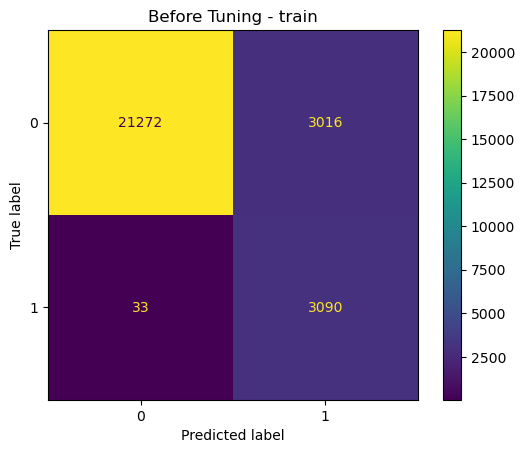

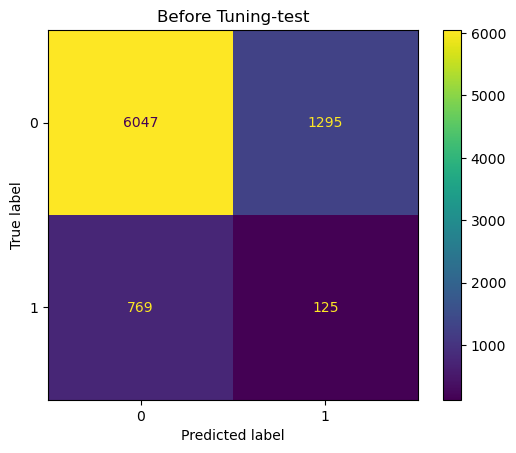

In [61]:
# Check False Negative and False Positive
cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_dt.classes_)
cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_dt.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=pipe_dt.classes_)
disp_train.plot()
plt.title('Before Tuning - train')

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=pipe_dt.classes_)
disp_test.plot()
plt.title('Before Tuning-test')

From this we can see that:
* FP = there is a significant increase of the FP from the train to test set. 
* FN = the false negative is reduced although it's still many in the test set.


In [62]:
# create function to table reports recap
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # calculate f1-score
    train_f1=f1_score(y_train,y_pred_train)
    test_f1=f1_score(y_test,y_pred_test)

    # calculate fp fn
    cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_dt.classes_)
    cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_dt.classes_)

    # extract FP FN
    fn_train = cm_train[1,0]
    fp_train = cm_train[0,1]
    fn_test = cm_test[1,0]
    fp_test = cm_test[0,1]


    # create dictionary
    score_reports = {
        'train-f1score':train_f1,
        'test-f1score':test_f1,
        'train-fn':fn_train,
        'test-fn': fn_test,
        'train-fp': fp_train,
        'test-fp':fp_test
    }

    # add reports
    all_reports[name] = score_reports
    return all_reports 


In [63]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Before Tuning')
pd.DataFrame(all_reports)

,Before Tuning
train-f1score,0.669628
test-f1score,0.108038
train-fn,33.000000
test-fn,769.000000
train-fp,3016.000000
test-fp,1295.000000


# Hyperparameter Tuning

In [64]:
# Define the decision parameter grid
params = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5]
}

# Define Random search
tuning = RandomizedSearchCV(pipe_dt, param_distributions = params, n_iter=25, cv=5, scoring='f1', n_jobs=-1, random_state=30)

# Train the tune model
tuning.fit(X_train, y_train)

# Get the best parameters
best_params = tuning.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'decisiontreeclassifier__min_samples_split': 4, 'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__max_depth': 1, 'decisiontreeclassifier__criterion': 'gini'}


In [65]:
# Get the best hyperparameters
bestParams = tuning.best_estimator_
bestParams

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['age', 'previous']),
                                                 ('rbs', RobustScaler(),
                                                  ['euribor3m', 'nr.employed']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital', 'housing',
                                                   'contact']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['mar',
                                                                              'apr',
                                                                              'may',
                                                                              'jun',
                                                                              'jul',
                                                                              'aug',
                                                                              'sep',
                                                                              'oct',
                                                                              'nov',
                                                                              'dec']]),
                                                  ['month'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                                        min_samples_leaf=5, min_samples_split=4,
                                        random_state=70))])

In [66]:
# Define best param & model tuning
best_dt = tuning.best_estimator_

#  Evaluate best RF
y_pred_train_best = best_dt.predict(X_train)
y_pred_test_best = best_dt.predict(X_test)

# Print classification report
print(f'Decision Tree - Train - After Tuning')
print(f'{classification_report(y_train, y_pred_train_best)}')
print('')
print(f'Decision Tree - Test - Before Tuning')
print(f'{classification_report(y_test, y_pred_test_best)}')

Decision Tree - Train - After Tuning
              precision    recall  f1-score   support

           0       0.90      0.07      0.14     24288
           1       0.12      0.94      0.21      3123

    accuracy                           0.17     27411
   macro avg       0.51      0.51      0.17     27411
weighted avg       0.81      0.17      0.14     27411


Decision Tree - Test - Before Tuning
              precision    recall  f1-score   support

           0       0.89      0.03      0.07      7342
           1       0.11      0.97      0.20       894

    accuracy                           0.14      8236
   macro avg       0.50      0.50      0.13      8236
weighted avg       0.81      0.14      0.08      8236



# Interpretation

Text(0.5, 1.0, 'After Tuning-test')

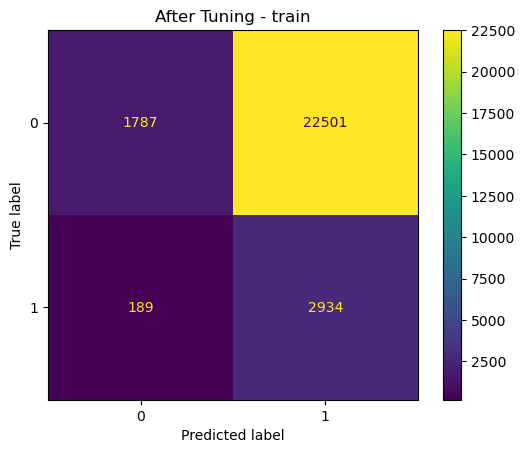

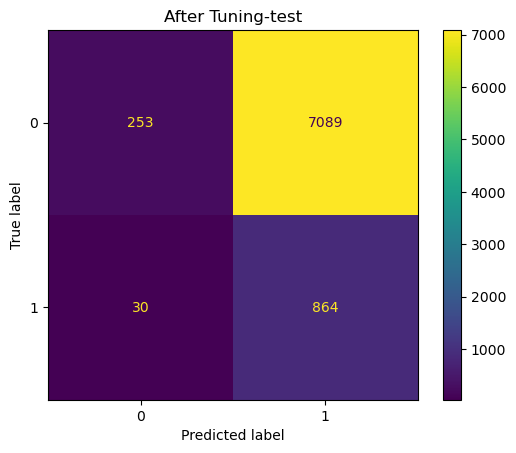

In [67]:
# Check False Negative and False Positive - After Tuning
cm_train_best = confusion_matrix(y_train, y_pred_train_best, labels=best_dt.classes_)
cm_test_best = confusion_matrix(y_test, y_pred_test_best, labels=best_dt.classes_)

disp_train_best = ConfusionMatrixDisplay(confusion_matrix=cm_train_best,display_labels=best_dt.classes_)
disp_train_best.plot()
plt.title('After Tuning - train')

disp_test_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_best,display_labels=best_dt.classes_)
disp_test_best.plot()
plt.title('After Tuning-test')

In [68]:
all_reports_aft = performance_report(all_reports, y_train, y_pred_train_best, y_test, y_pred_test_best, 'After Tuning')
pd.DataFrame(all_reports)

,Before Tuning,After Tuning
train-f1score,0.669628,0.205477
test-f1score,0.108038,0.195320
train-fn,33.000000,189.000000
test-fn,769.000000,30.000000
train-fp,3016.000000,22501.000000
test-fp,1295.000000,7089.000000


The F1-score on the training set has drastically decreased after tuning. This suggests that the model's ability to balance precision and recall for the training data has significantly worsened.


In [69]:
# Model Saving
with open('best_model.pkl', 'wb') as file_1: # wb = write binary
    pickle.dump(best_dt, file_1)

### Conclusion:

This is definitely an overfit model, indicating that the model performs well on the training data but poorly on the test data  

* Although the test F1-score has slightly improved, it remains very low, indicating that the model's overall performance on the test data is still inadequate.  

* The significant reduction in false positives on the test set is a positive change, as the model is now making fewer incorrect positive predictions. 

* However, the increase in false negatives indicates that the model is not effectively identifying the positive class.

Possible Causes:
* Over-Tuning
* Class Imbalance

Further improvement:
* Conduct a more comprehensive evaluation of the model using additional metrics such as precision, recall, and the ROC-AUC score to get a more nuanced understanding of performance.  

* Revisit feature selection and engineering. Ensure that the features used are relevant and that the model is not overfitting to noise in the training data.

Business insights:

Model Reliability:  
* The current predictive model is unreliable for making business decisions due to overfitting. While it performs well on the training data, its poor performance on the test data indicates it cannot generalize to new clients.  

* The skewness in predictions indicates that the model might be biased towards certain client demographics or behaviors. This information can be usedto refine marketing strategies and client outreach programs.

Client Targeting:  
* Due to the high number of false negatives and low F1-score, the model is missing many clients who might actually be interested in the term deposit.
The model needs to be refined to reduce false negatives. 

In [70]:
# Detect all originalcolumns to create new inference data (unseen data)
print(df_ori.columns)
print(df_ori.loc[10])

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
age                        41
job               blue-collar
marital               married
education             unknown
default               unknown
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                   55
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 10, dtype: object
